# Projet

In [1]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from time import time

from numpy.linalg import eig, inv
import warnings
warnings.filterwarnings("ignore")

In [2]:
from keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

2022-01-01 15:46:25.521398: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-01 15:46:25.521439: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Classes :
|nb|name|
|--|--|
|0 |T-shirt/top|
|1 |Trouser|
|2 |Pullover|
|3 |Dress|
|4 |Coat|
|5 |Sandal|
|6 |Shirt|
|7 |Sneaker|
|8 |Bag|
|9 |Ankle boot|

In [3]:
classes = { 0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}
def isA(nb: int):
  return classes[nb]

Class: Ankle boot


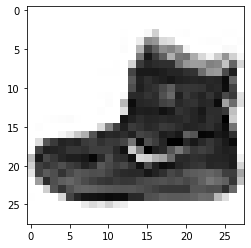

In [4]:
from matplotlib import cm
plt.imshow(X_train[0], cmap=cm.Greys)
print("Class:", isA(Y_train[0]))

On voit que l'element 0 est de la class `Ankle boot`

## 1. Test des differents algorithmes de classification

In [5]:
# Re shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

### K-nn

In [6]:
from sklearn.neighbors import KNeighborsClassifier

def executeKnn(X_train, Y_train, X_test, Y_test, k=5):
  # Create K-nn classifier
  knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  t = time()
  # Train the classifier
  knn.fit(X_train, Y_train)
  print("training time: ", time() - t)

  # Test the classifier
  Y_pred = knn.predict(X_test)

  print("k = {:d} : {:.2%}".format(k, accuracy_score(Y_test, Y_pred)))

On se limite à un échantillon du dataset car le K-nn était trop lent à s'exécuter

In [7]:
nbTrain = X_train.shape[0]
print("Nb train", nbTrain)
nbTest = X_test.shape[0]
print("Nb test", nbTest)

divFactor = 8

nbTrainSample = round(nbTrain / divFactor)
print("Nb train sample", nbTrainSample)
nbTestSample = round(nbTest / divFactor)
print("Nb test sample", nbTestSample)

X_train_sample = X_train[:nbTrainSample]
Y_train_sample = Y_train[:nbTrainSample]
X_test_sample = X_test[:nbTestSample]
Y_test_sample = Y_test[:nbTestSample]

Nb train 60000
Nb test 10000
Nb train sample 7500
Nb test sample 1250


In [8]:
for k in range (1, 6):
  executeKnn(X_train_sample, Y_train_sample, X_test_sample, Y_test_sample, k)

training time:  0.5710036754608154
k = 1 : 79.28%
training time:  0.5431709289550781
k = 2 : 80.64%
training time:  0.5408463478088379
k = 3 : 80.80%
training time:  0.5455806255340576
k = 4 : 80.88%
training time:  0.5360336303710938
k = 5 : 82.24%


### Classifieur bayésien

In [9]:
from sklearn.naive_bayes import GaussianNB

def executeBayes(X_train, Y_train, X_test, Y_test):
  # Create ML classifier
  knn = GaussianNB()
  t = time()
  # Train the classifier
  knn.fit(X_train, Y_train)
  print("training time: ", time() - t)

  # Test the classifier
  Y_pred = knn.predict(X_test)

  print("{:.2%}".format(accuracy_score(Y_test, Y_pred)))

In [10]:
executeBayes(X_train, Y_train, X_test, Y_test)

training time:  0.7100265026092529
58.56%


### Arbre de décision

In [11]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

def displayTree(dt, features_cols, class_names):
  dot_data = StringIO()
  export_graphviz(dt, out_file=dot_data,
                  filled=True, rounded=True,
                  special_characters=True,feature_names = features_cols,class_names=class_names)
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
  graph.write_png('fashion.png')
  Image(graph.create_png())

In [12]:
from sklearn.tree import DecisionTreeClassifier

def executeDecisionTree(X_train, Y_train, X_test, Y_test, display=False):
  # Create Decision Tree classifier
  dt = DecisionTreeClassifier(criterion='entropy')
  t = time()
  # Train the classifier
  dt.fit(X_train, Y_train)
  print("training time: ", time() - t)

  if display:
    features_cols = [str(k) for k in range(X_train.shape[1])]
    class_names = [str(k) for k in classes.keys()]
    displayTree(dt, features_cols, class_names)

  # Test the classifier
  Y_pred = dt.predict(X_test)

  print("{:.2%}".format(accuracy_score(Y_test, Y_pred)))

In [13]:
executeDecisionTree(X_train, Y_train, X_test, Y_test)

training time:  34.88049650192261
80.36%


On a trop de données donc l'arbre de décision est trop grand pour être affiché

On cherche les meilleurs paramètres.

In [14]:
if False:
  criterion = ['gini', 'entropy']
  max_depth = [3, 5, 10]
  min_samples_leaf = [1, 2, 5]
  min_samples_split = [2, 3, 4]

  best_params = None
  best_score = 0
  for c in criterion:
      for depth in max_depth:
          for l in min_samples_leaf:
              for s in min_samples_split:
                  dt = DecisionTreeClassifier(criterion=c, max_depth=depth, min_samples_leaf=l, min_samples_split=s)
                  dt.fit(X_train, Y_train)
                  y_pred = dt.predict(X_test)
                  scores = accuracy_score(Y_test, y_pred)
                  if best_score==0 or scores > best_score:
                      best_score = scores
                      best_params = [c, depth, l, s]

  print('Best Accuracy: ','{:2.2%}'.format(best_score))
  print('Parameters: ', best_params)

### Forêts aléatoires

In [19]:
from sklearn.ensemble import RandomForestClassifier

def executeRandomForest(X_train, Y_train, X_test, Y_test):
  # Create Random Forest classifier
  rf = RandomForestClassifier()
  t = time()
  # Train the classifier
  rf.fit(X_train, Y_train)
  print("training time: ", time() - t)

  # Test the classifier
  Y_pred = rf.predict(X_test)

  print("{:.2%}".format(accuracy_score(Y_test, Y_pred)))

In [20]:
executeRandomForest(X_train, Y_train, X_test, Y_test)

training time:  86.60316777229309
87.29%


On cherche les meilleurs paramètres.

In [21]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [3, 5, 10]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 5, 10, None], 'min_samples_split': [1, 2, 5], 'min_samples_leaf': [2, 3, 4], 'bootstrap': [True, False]}


In [23]:
if True:
  rf = RandomForestClassifier()
  rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100,
                                cv = 3, verbose=2, random_state=42, n_jobs = -1)
  t = time()

  rf_random.fit(X_train_sample, Y_train_sample)
  print("training time: ", time() - t)

  Y_pred = rf.predict(X_test_sample)
  print("{:.2%}".format(accuracy_score(Y_test_sample, Y_pred)))
  rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True 
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True 
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True 
[CV] n_estimators=1200, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True, total=   0.4s
[CV] n_estimators=1200, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True, total=   0.5s
[CV] n_estimators=1200, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True, total=   0.5s
[CV] n_estimators=1800, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1800, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   0.7s
[CV] n_estimators=1800, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1800, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   0.9s
[CV] n_estimators=1800, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1800, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   0.9s
[CV] n_estimators=1200, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=True 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=True, total=   0.6s
[CV] n_estimators=1200, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=True 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=True, total=   0.5s
[CV] n_estimators=1200, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=True 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=True, total=   0.6s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True, total=  35.5s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True, total=  35.8s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=True, total=  36.1s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=5, bootstrap=False 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=5, bootstrap=False, total=   0.3s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=5, bootstrap=False 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=5, bootstrap=False, total=   0.4s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=5, bootstrap=False 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=5, bootstrap=False, total=   0.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=None, bootstrap=False, total=  18.8s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=None, bootstrap=False, total=  18.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=None, bootstrap=False, total=  19.6s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estima

/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=5, bootstrap=True, total=   0.4s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=5, bootstrap=True 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=5, bootstrap=True, total=   0.4s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=5, bootstrap=True 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=5, bootstrap=True, total=   0.4s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total= 2.6min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total= 2.7min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=None, bootstrap=True, total= 2.1min
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=3, bootstrap=True 
[CV]  n_estimators=2

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.7min


[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=3, bootstrap=True, total=  24.8s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=10, bootstrap=False, total= 1.3min
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=None, bootstrap=True, total= 2.3min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=5, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=5, bootstrap=False, total=  10.5s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=5, bootstrap=False 
[CV]  n_estimators=800, min_sa

/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.8s
[CV] n_estimators=1200, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.8s
[CV] n_estimators=1200, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.8s
[CV] n_estimators=1400, min_samples_split=1, min_samples_leaf=3, max_features=auto, max_depth=3, bootstrap=False 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1400, min_samples_split=1, min_samples_leaf=3, max_features=auto, max_depth=3, bootstrap=False, total=   0.6s
[CV] n_estimators=1400, min_samples_split=1, min_samples_leaf=3, max_features=auto, max_depth=3, bootstrap=False 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1400, min_samples_split=1, min_samples_leaf=3, max_features=auto, max_depth=3, bootstrap=False, total=   0.6s
[CV] n_estimators=1400, min_samples_split=1, min_samples_leaf=3, max_features=auto, max_depth=3, bootstrap=False 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1400, min_samples_split=1, min_samples_leaf=3, max_features=auto, max_depth=3, bootstrap=False, total=   0.6s
[CV] n_estimators=1400, min_samples_split=1, min_samples_leaf=3, max_features=sqrt, max_depth=5, bootstrap=True 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1400, min_samples_split=1, min_samples_leaf=3, max_features=sqrt, max_depth=5, bootstrap=True, total=   0.7s
[CV] n_estimators=1400, min_samples_split=1, min_samples_leaf=3, max_features=sqrt, max_depth=5, bootstrap=True 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1400, min_samples_split=1, min_samples_leaf=3, max_features=sqrt, max_depth=5, bootstrap=True, total=   0.6s
[CV] n_estimators=1400, min_samples_split=1, min_samples_leaf=3, max_features=sqrt, max_depth=5, bootstrap=True 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1400, min_samples_split=1, min_samples_leaf=3, max_features=sqrt, max_depth=5, bootstrap=True, total=   0.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=True, total=   6.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=True, total=   6.4s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=5, bootstrap=True, total=   6.7s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=600, min_samples_split

/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=800, min_samples_split=1, min_samples_leaf=3, max_features=sqrt, max_depth=5, bootstrap=False, total=   0.3s
[CV] n_estimators=800, min_samples_split=1, min_samples_leaf=3, max_features=sqrt, max_depth=5, bootstrap=False 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=800, min_samples_split=1, min_samples_leaf=3, max_features=sqrt, max_depth=5, bootstrap=False, total=   0.3s
[CV] n_estimators=800, min_samples_split=1, min_samples_leaf=3, max_features=sqrt, max_depth=5, bootstrap=False 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will 

[CV]  n_estimators=800, min_samples_split=1, min_samples_leaf=3, max_features=sqrt, max_depth=5, bootstrap=False, total=   0.3s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total=   0.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=None, bootstrap=False, total= 2.1min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True, total=  10.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True, total=  10.7s
[CV] n_estimators=2000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=3, bootstrap=False 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=2000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=3, bootstrap=False, total=   0.7s
[CV] n_estimators=2000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=3, bootstrap=False 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=2000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=3, bootstrap=False, total=   0.8s
[CV] n_estimators=2000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=3, bootstrap=False 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=2000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=3, bootstrap=False, total=   0.7s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=True, total=  11.2s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=  44.0s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=  45.4s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=1400, 

/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will 

[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   0.1s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=3, bootstrap=True, total=   7.4s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=False 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=10, bootstrap=True, total=  59.0s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=False, total=  25.4s
[CV] n_estimators=800, min_samples_split=1, min_samples_leaf=3, max_features=auto, max_depth=10, bootstrap=False 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=800, min_samples_split=1, min_samples_leaf=3, max_features=auto, max_depth=10, bootstrap=False, total=   0.3s
[CV] n_estimators=800, min_samples_split=1, min_samples_leaf=3, max_features=auto, max_depth=10, bootstrap=False 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=800, min_samples_split=1, min_samples_leaf=3, max_features=auto, max_depth=10, bootstrap=False, total=   0.3s
[CV] n_estimators=800, min_samples_split=1, min_samples_leaf=3, max_features=auto, max_depth=10, bootstrap=False 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=800, min_samples_split=1, min_samples_leaf=3, max_features=auto, max_depth=10, bootstrap=False, total=   0.3s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=False, total=  25.9s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, bootstrap=False 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=10, bootstrap=True, total=  59.6s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=3, bootstrap=False, total=  25.7s
[CV] n_estimators=1400, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1400, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.5s
[CV] n_estimators=1400, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1400, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.6s
[CV] n_estimators=1400, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1400, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.5s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=  55.9s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, bootstrap=False, total= 1.4min
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, bootstrap=False, total= 1.4min
[CV] n_estimators=1600, min_samples_split=1, min_samples_leaf=3, max_features=sqrt, max_depth=3, bootstrap=False 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1600, min_samples_split=1, min_samples_leaf=3, max_features=sqrt, max_depth=3, bootstrap=False, total=   0.6s
[CV] n_estimators=1600, min_samples_split=1, min_samples_leaf=3, max_features=sqrt, max_depth=3, bootstrap=False 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1600, min_samples_split=1, min_samples_leaf=3, max_features=sqrt, max_depth=3, bootstrap=False, total=   0.6s
[CV] n_estimators=1600, min_samples_split=1, min_samples_leaf=3, max_features=sqrt, max_depth=3, bootstrap=False 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1600, min_samples_split=1, min_samples_leaf=3, max_features=sqrt, max_depth=3, bootstrap=False, total=   0.6s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=3, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=5, bootstrap=False, total= 1.4min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=3, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=3, bootstrap=True, total=  34.8s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=3, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=3, bootstrap=True, total=  34.3s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   0.4s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   0.5s
[CV] n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1000, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   0.6s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total= 1.0min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total= 1.0min
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=3, bootstrap=True, total=  37.0s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=3, bootstrap=True 
[CV]  n_estimators=2000, min

/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=False, total=   0.2s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=False 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=False, total=   0.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total= 2.7min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, total=  11.1s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, total=  11.8s
[CV] n_estimators=1200, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   0.7s
[CV] n_estimators=1200, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   0.6s
[CV] n_estimators=1200, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total= 2.8min
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=3, bootstrap=False 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1200, min_samples_split=1, min_samples_leaf=2, max_features=sqrt, max_depth=5, bootstrap=True, total=   0.7s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=3, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total= 2.8min
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=3, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, total=  14.2s
[CV] n_estimators=2000, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=2000, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False, total=   0.8s
[CV] n_estimators=2000, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=2000, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False, total=   0.9s
[CV] n_estimators=2000, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=2000, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=None, bootstrap=False, total=   0.8s
[CV] n_estimators=1600, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=True 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1600, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=True, total=   0.8s
[CV] n_estimators=1600, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=True 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1600, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=True, total=   0.6s
[CV] n_estimators=1600, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=True 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will 

[CV]  n_estimators=1600, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=3, bootstrap=True, total=   0.7s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=5, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=5, bootstrap=True, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=5, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=5, bootstrap=True, total=   0.1s
[CV] n_estimators=200, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=5, bootstrap=True 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=200, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=5, bootstrap=True, total=   0.1s
[CV] n_estimators=1400, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1400, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.6s
[CV] n_estimators=1400, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1400, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.6s
[CV] n_estimators=1400, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False 


/home/charles/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  n_estimators=1400, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.6s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=5, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=3, bootstrap=False, total=  18.2s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=5, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=3, bootstrap=False, total=  18.2s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=5, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=3, max_features=auto, max_depth=3, bootstrap=False, total=  18.1s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=1000, min_s

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 20.1min


On voit que l'accuracy de K-NN, Random forest et Decision tree tourne autour de 80%. Donc ces algorithmes sont efficaces par rapport à Bayes qui n'a qu'une accuracy à 60%.

## 2. Comparaison des technique de reduction de dimension